WORK BY: KENNETH GAKURU
DATA SCIENCE CLASS- DFS0-7

MICROSOFT PRESENTATION TO THE MARKETING TEAM 
(BASED ON THE DATA COLLECTED FROM THE YEAR 2010-2018)


INTRODUCTION.

The main aim of the analysis is to prepare our marketing team for the coming projects and better ways to get our products out there.


In [725]:
#IMPORTING ALL THE 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [726]:
#Open the database bom.movies_gross(BMG)
BMG = pd.read_csv("../bom.movie_gross.csv")
BMG


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [727]:
BMG 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [728]:
BMG.shape

(3387, 5)

In [729]:
#dropping the missing values
BMG = BMG.dropna()


In [730]:
#dropping duplicates
BMG = BMG.drop_duplicates()


In [731]:
#Filling all missing values in domestic gross with the mean
BMG = BMG.fillna({'domestic_gross': BMG['domestic_gross'].mean()})

In [732]:
#CLEANING BMG
BMG



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [733]:
#Replace missing values with the most common value of each column in: 'foreign_gross'
BMG = BMG.fillna({'foreign_gross': BMG['foreign_gross'].mode()[0]})


In [734]:
BMG.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [735]:
#cleaned BMG 
BMG 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [736]:
TMDB = pd.read_csv("../tmdb.movies.csv")
TMDB

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [737]:
# Drop rows with missing data across all columns
TMDB = TMDB.dropna()

In [738]:
TMDB 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [739]:
#Checking for missing values in the TMDB columns
TMDB.isnull ().sum ()


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [740]:
TMDB .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [741]:
#joining the two data frames (BMG & TMDB) through the similar column title

merged1 = TMDB.merge(BMG, how = 'outer')
display(merged1.head())

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,0.0,"[12, 14, 10751]",12444.0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788.0,NaN,NaN,NaN,NaN
1,1.0,"[14, 12, 16, 10751]",10191.0,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610.0,P/DW,217600000.0,277300000,2010.0
2,2.0,"[12, 28, 878]",10138.0,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368.0,Par.,312400000.0,311500000,2010.0
3,3.0,"[16, 35, 10751]",862.0,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174.0,NaN,NaN,NaN,NaN
4,2473.0,"[16, 35, 10751]",862.0,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174.0,NaN,NaN,NaN,NaN


In [742]:
merged1.shape

(27042, 14)

In [743]:
merged1.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'studio', 'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

In [744]:
# Drop columns: 'Unnamed: 0', 'genre_ids' and 6 other columns
merged1 = merged1.drop(columns=['Unnamed: 0', 'genre_ids', 'id', 'vote_average', 'vote_count', 'studio', 'original_title'])

In [745]:
merged1

,original_language,popularity,release_date,title,domestic_gross,foreign_gross,year
0,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,NaN,NaN,NaN
1,en,28.734,2010-03-26,How to Train Your Dragon,217600000.0,277300000,2010.0
2,en,28.515,2010-05-07,Iron Man 2,312400000.0,311500000,2010.0
3,en,28.005,1995-11-22,Toy Story,NaN,NaN,NaN
4,en,28.005,1995-11-22,Toy Story,NaN,NaN,NaN
...,...,...,...,...,...,...,...
27037,NaN,NaN,NaN,Hichki,330000.0,3900000,2018.0
27038,NaN,NaN,NaN,Don't Worry He Won't Get Far on Foot,1400000.0,2500000,2018.0
27039,NaN,NaN,NaN,Billionaire Boy's Club,1300.0,2500000,2018.0
27040,NaN,NaN,NaN,Reign of Judges: Title of Liberty - Concept Short,93200.0,5200,2018.0


In [746]:
merged1

,original_language,popularity,release_date,title,domestic_gross,foreign_gross,year
0,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,NaN,NaN,NaN
1,en,28.734,2010-03-26,How to Train Your Dragon,217600000.0,277300000,2010.0
2,en,28.515,2010-05-07,Iron Man 2,312400000.0,311500000,2010.0
3,en,28.005,1995-11-22,Toy Story,NaN,NaN,NaN
4,en,28.005,1995-11-22,Toy Story,NaN,NaN,NaN
...,...,...,...,...,...,...,...
27037,NaN,NaN,NaN,Hichki,330000.0,3900000,2018.0
27038,NaN,NaN,NaN,Don't Worry He Won't Get Far on Foot,1400000.0,2500000,2018.0
27039,NaN,NaN,NaN,Billionaire Boy's Club,1300.0,2500000,2018.0
27040,NaN,NaN,NaN,Reign of Judges: Title of Liberty - Concept Short,93200.0,5200,2018.0


In [747]:
merged1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27042 entries, 0 to 27041
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  26517 non-null  object 
 1   popularity         26517 non-null  float64
 2   release_date       26517 non-null  object 
 3   title              27042 non-null  object 
 4   domestic_gross     2226 non-null   float64
 5   foreign_gross      2226 non-null   object 
 6   year               2226 non-null   float64
dtypes: float64(3), object(4)
memory usage: 1.4+ MB


In [748]:
#Checking to see the columns we have in the merged data above.
merged1.columns


Index(['original_language', 'popularity', 'release_date', 'title',
       'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

This shows the top 10 movies with the highest domestic gross in relevance to their popularity.


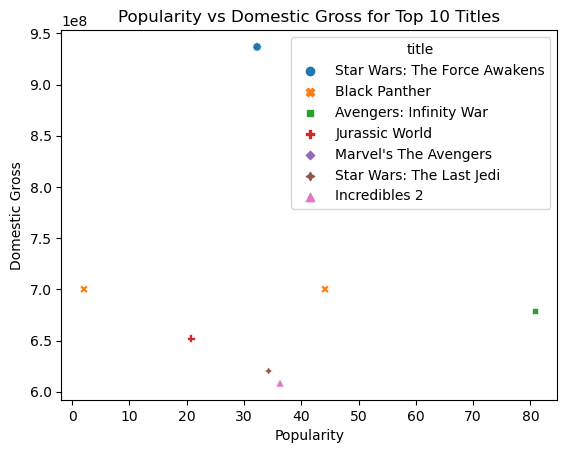

In [ ]:
# import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# sort the data by domestic_gross and select the top 10 titles
top_10_domestic = merged1.sort_values(by="domestic_gross", ascending=False).head(10)

# plot the scatter plot for domestic_gross
sns.scatterplot(data=top_10_domestic, x="popularity", y="domestic_gross", hue="title", style="title")

# set the title and labels for the plot
plt.title("Popularity vs Domestic Gross for Top 10 Titles")
plt.xlabel("Popularity")
plt.ylabel("Domestic Gross")

# show the plot
plt.show()


The graph below shows the top ten most popular shows in the domestic and foreign gross respectifully.

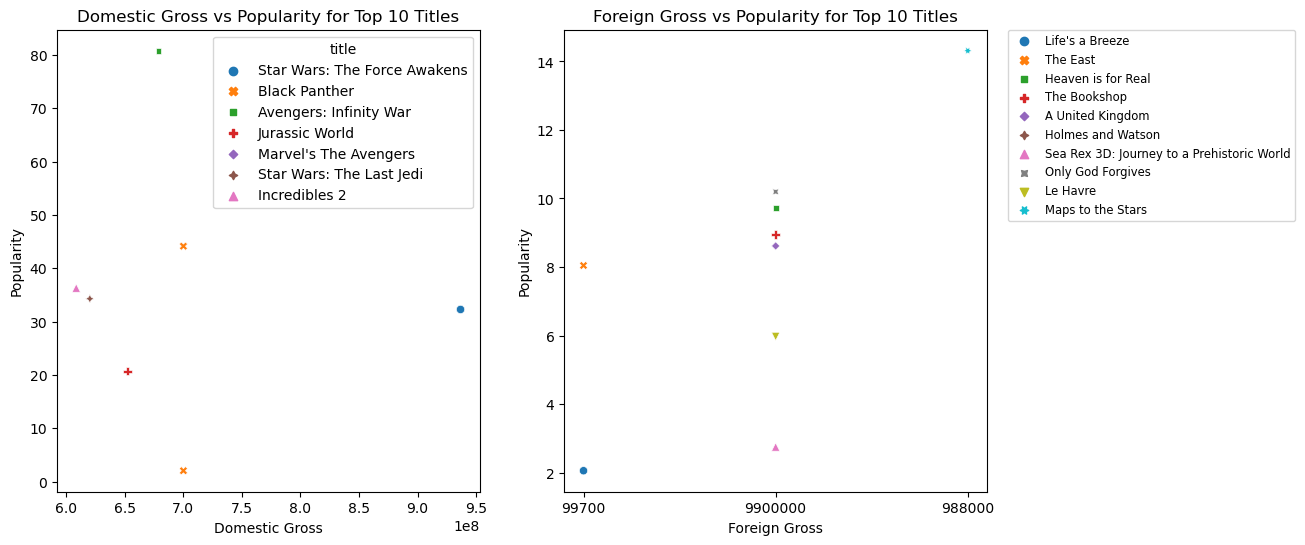

In [ ]:
# import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# sort the data by domestic_gross and select the top 10 titles
top_10_domestic = merged1.sort_values(by="domestic_gross", ascending=False).head(10)

# sort the data by foreign_gross and select the top 10 titles
top_10_foreign = merged1.sort_values(by="foreign_gross", ascending=False).head(10)

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot the scatter plot for domestic_gross on the first subplot
sns.scatterplot(data=top_10_domestic, x="domestic_gross", y="popularity", hue="title", style="title", ax=ax1)

# set the title and labels for the first subplot
ax1.set_title("Domestic Gross vs Popularity for Top 10 Titles")
ax1.set_xlabel("Domestic Gross")
ax1.set_ylabel("Popularity")

# plot the scatter plot for foreign_gross on the second subplot
sns.scatterplot(data=top_10_foreign, x="foreign_gross", y="popularity", hue="title", style="title", ax=ax2)

# set the title and labels for the second subplot
ax2.set_title("Foreign Gross vs Popularity for Top 10 Titles")
ax2.set_xlabel("Foreign Gross")
ax2.set_ylabel("Popularity")

# adjust the legend position and size
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize="small")

# show the plot
plt.show()


RESULTS.
For the first graph. The more the popularity the more the domestic gross.

Months with the highest release days  in the year 2017 
MARCH, APRIL, JANUARY AND OCTOBER.




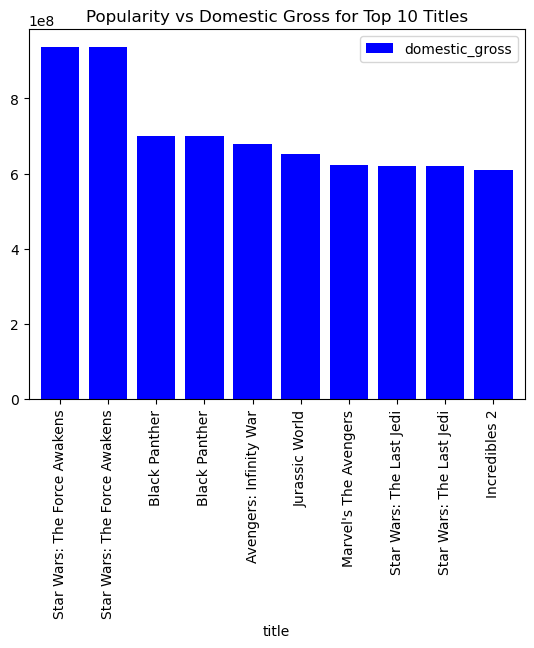

In [ ]:
# import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# sort the data by domestic_gross and select the top 10 titles
top_10_domestic = merged1.sort_values(by="domestic_gross", ascending=False).head(10)

# plot the bar graph for domestic_gross
top_10_domestic.plot.bar(x="title", y="domestic_gross", color="blue", width=0.8, title="Popularity vs Domestic Gross for Top 10 Titles")

# show the plot
plt.show()


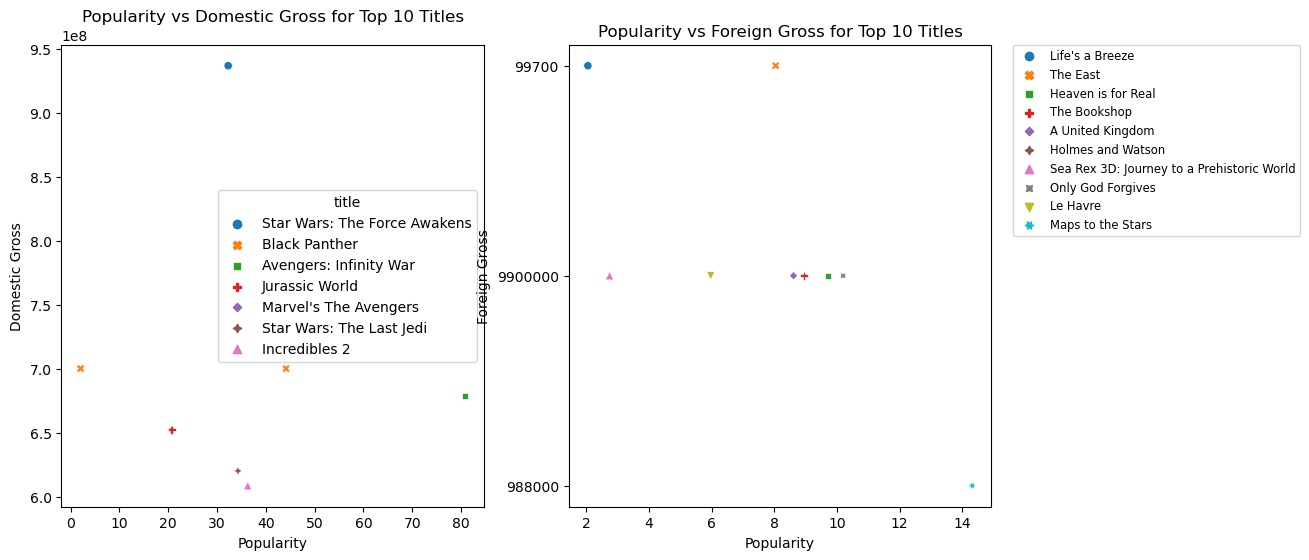

In [ ]:
# import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# sort the data by domestic_gross and select the top 10 titles
top_10_domestic = merged1.sort_values(by="domestic_gross", ascending=False).head(10)

# sort the data by foreign_gross and select the top 10 titles
top_10_foreign = merged1.sort_values(by="foreign_gross", ascending=False).head(10)

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot the scatter plot for domestic_gross on the first subplot
sns.scatterplot(data=top_10_domestic, x="popularity", y="domestic_gross", hue="title", style="title", ax=ax1)

# set the title and labels for the first subplot
ax1.set_title("Popularity vs Domestic Gross for Top 10 Titles")
ax1.set_xlabel("Popularity")
ax1.set_ylabel("Domestic Gross")

# plot the scatter plot for foreign_gross on the second subplot
sns.scatterplot(data=top_10_foreign, x="popularity", y="foreign_gross", hue="title", style="title", ax=ax2)

# set the title and labels for the second subplot
ax2.set_title("Popularity vs Foreign Gross for Top 10 Titles")
ax2.set_xlabel("Popularity")
ax2.set_ylabel("Foreign Gross")

# adjust the legend position and size
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize="small")

# show the plot
plt.show()
